# The Sparks Foundation

<h2>Data Science and Business Analytics</h2>
 <h3> Batch - November 2021</h3>

<h4>Task #5 : Exploratory Data Analysis - Sports </h4>

Dataset : https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("deliveries.csv")

In [3]:
data.head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
data.shape

(179078, 21)

In [6]:
data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [8]:
data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

# Matches played by each team

In [9]:
team_names = list(data['batting_team'].unique())

In [10]:
matches_played={}
for team in team_names:
    matches_played[f"{team}"] = data[data['batting_team']== f"{team}"]['match_id'].nunique()

In [11]:
matches_played

{'Sunrisers Hyderabad': 108,
 'Royal Challengers Bangalore': 180,
 'Mumbai Indians': 187,
 'Rising Pune Supergiants': 30,
 'Gujarat Lions': 30,
 'Kolkata Knight Riders': 178,
 'Kings XI Punjab': 176,
 'Delhi Daredevils': 161,
 'Chennai Super Kings': 164,
 'Rajasthan Royals': 146,
 'Deccan Chargers': 75,
 'Kochi Tuskers Kerala': 14,
 'Pune Warriors': 45,
 'Delhi Capitals': 16}

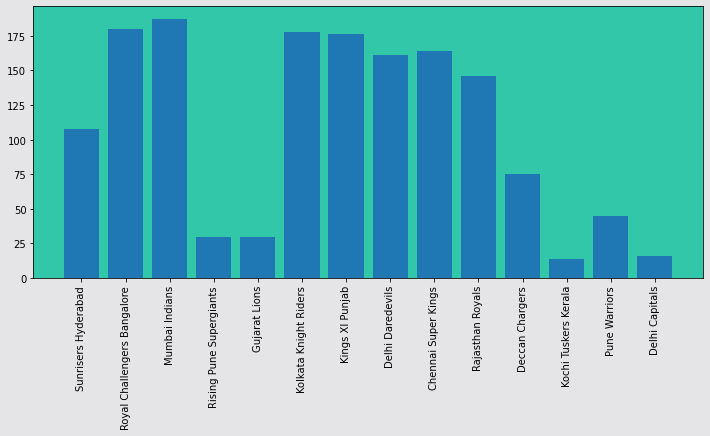

In [12]:
ig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e7" )
ax.set_facecolor("#32c7a9")
plt.bar(range(len(matches_played)), list(matches_played.values()), align='center')
plt.xticks(range(len(matches_played)), list(matches_played.keys()),rotation=90)

plt.show()

# Top Batsman

In [13]:
top_batsman={}
for team in team_names:
    top_batsman[f"{team}"] = list(pd.DataFrame(data[data['batting_team']== f"{team}"].
                                      groupby(['bowling_team','batsman']).total_runs.sum()[data[data['batting_team']== f"{team}"].
                                                                       groupby(['bowling_team','batsman']).total_runs.sum() > np.quantile(list(data[data['batting_team']== f"{team}"].
                                                                                                                                               groupby(['bowling_team','batsman']).total_runs.sum()),0.99)]).reset_index()['batsman'].unique())

In [14]:
top_batsman

{'Sunrisers Hyderabad': ['DA Warner', 'S Dhawan'],
 'Royal Challengers Bangalore': ['V Kohli', 'AB de Villiers', 'CH Gayle'],
 'Mumbai Indians': ['RG Sharma', 'KA Pollard'],
 'Rising Pune Supergiants': ['AM Rahane', 'SPD Smith'],
 'Gujarat Lions': ['SK Raina'],
 'Kolkata Knight Riders': ['G Gambhir', 'RV Uthappa'],
 'Kings XI Punjab': ['SE Marsh', 'DA Miller', 'WP Saha', 'KL Rahul'],
 'Delhi Daredevils': ['V Sehwag', 'DA Warner', 'RR Pant'],
 'Chennai Super Kings': ['SK Raina', 'MS Dhoni'],
 'Rajasthan Royals': ['SR Watson', 'AM Rahane'],
 'Deccan Chargers': ['RG Sharma', 'S Dhawan'],
 'Kochi Tuskers Kerala': [],
 'Pune Warriors': ['RV Uthappa'],
 'Delhi Capitals': ['RR Pant']}

These are the top batsman who scored the most

# Top bowler

In [15]:
bowlers = data[data['player_dismissed'].isnull()==False]

In [16]:
bowlers.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [17]:
bowlers.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
bowlers_group = pd.DataFrame(bowlers.groupby(['bowling_team','bowler']).player_dismissed.count())
bowlers_group.reset_index(inplace=True)

In [19]:
bowlers_group

,bowling_team,bowler,player_dismissed
0,Chennai Super Kings,A Flintoff,2
1,Chennai Super Kings,A Nehra,33
2,Chennai Super Kings,AS Rajpoot,1
3,Chennai Super Kings,B Laughlin,1
4,Chennai Super Kings,BW Hilfenhaus,23
...,...,...,...
604,Sunrisers Hyderabad,Shakib Al Hasan,18
605,Sunrisers Hyderabad,TA Boult,11
606,Sunrisers Hyderabad,V Shankar,1
607,Sunrisers Hyderabad,YK Pathan,1


In [20]:
bowlers_group['bowling_team'].unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

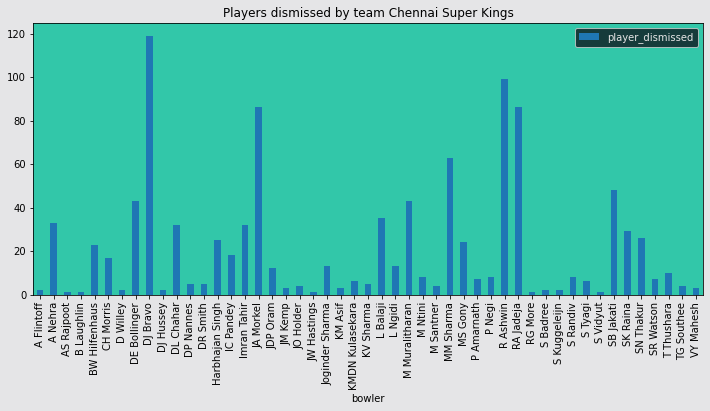

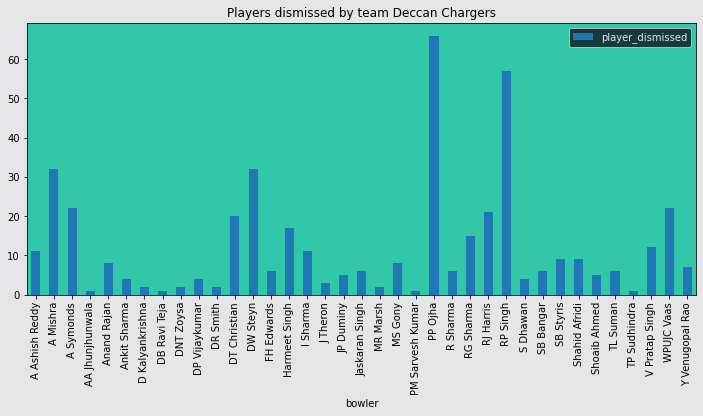

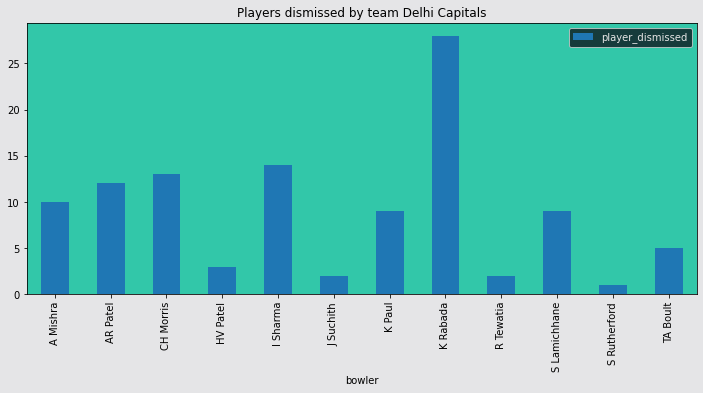

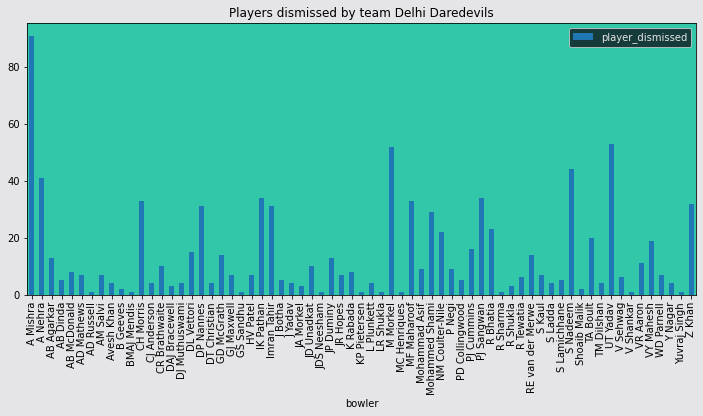

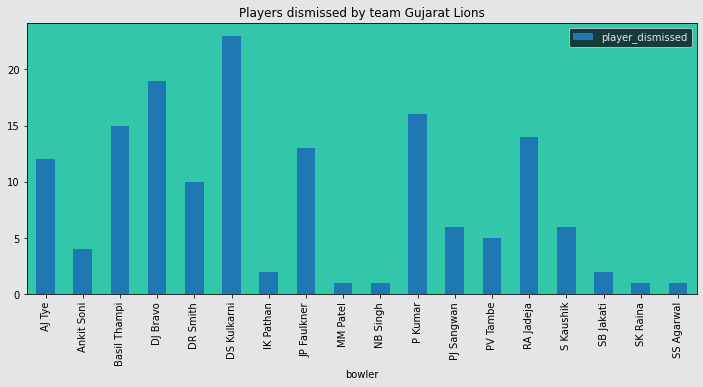

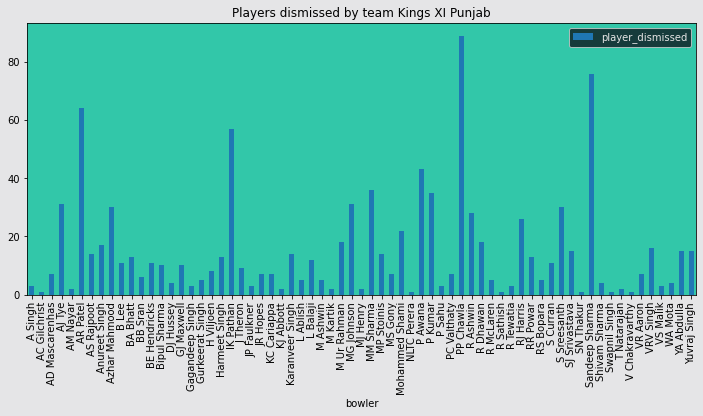

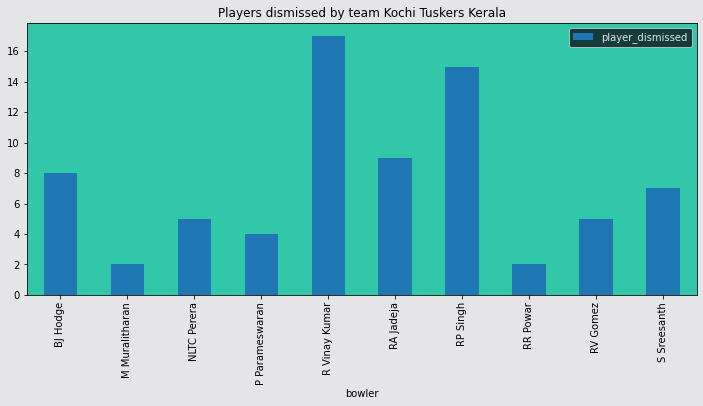

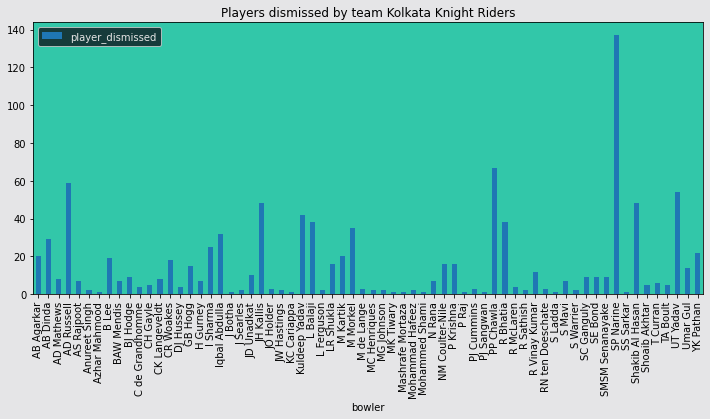

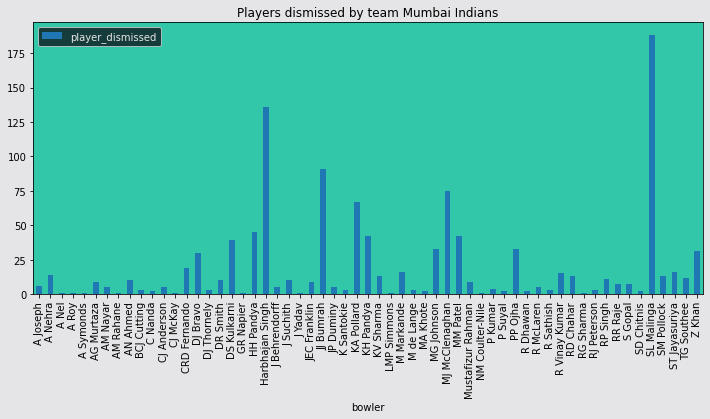

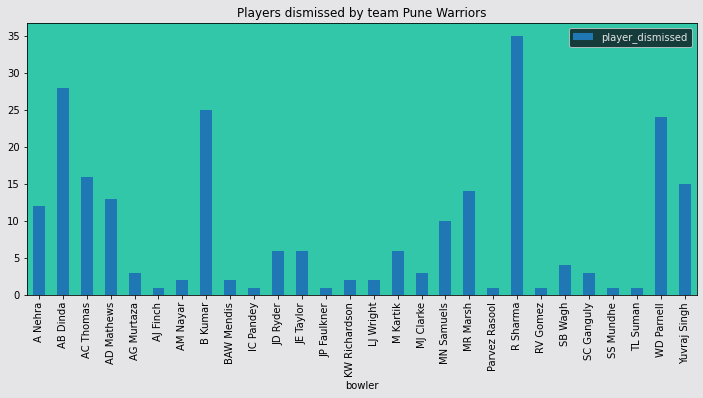

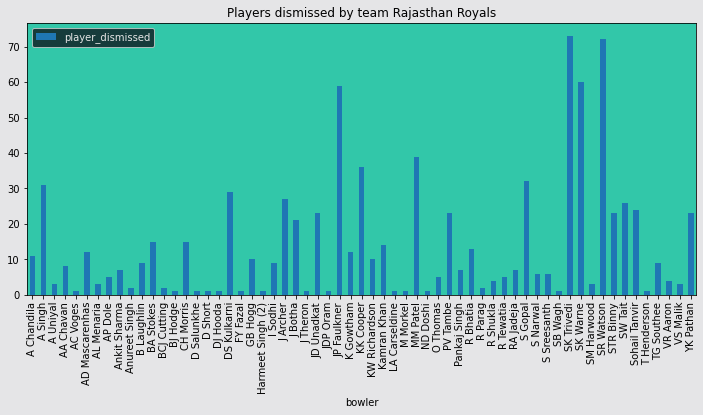

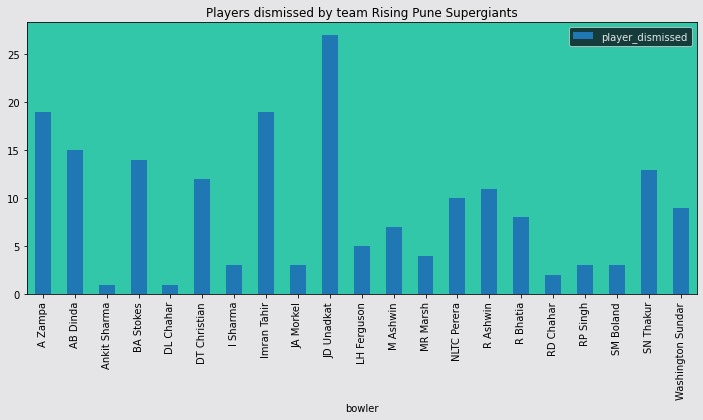

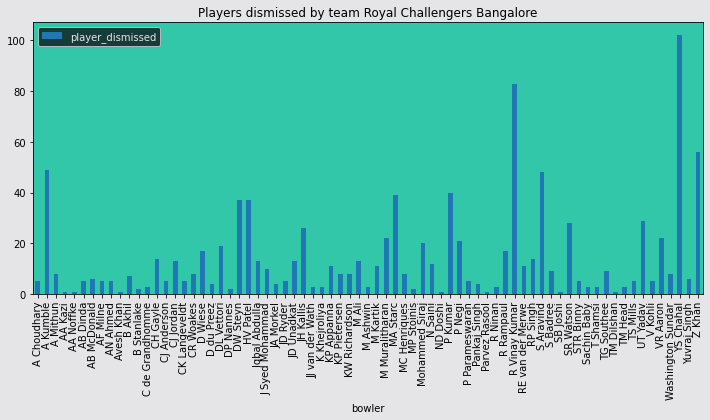

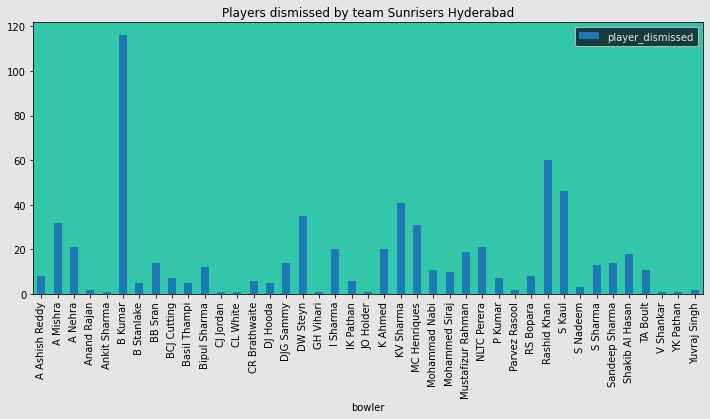

In [21]:
for row in bowlers_group['bowling_team'].unique():
    ig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e7" )
    ax.set_facecolor("#32c7a9")
    bowlers_group[bowlers_group['bowling_team']==f"{row}"].plot(x='bowler',y='player_dismissed',kind='bar',ax=ax).set_title(f"Players dismissed by team {row}")
    ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")
    plt.show()

In [22]:
bowling_teams = list(bowlers_group['bowling_team'].unique())

In [23]:
bowling_teams

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [24]:
top_bowler = {}
for bowling in bowling_teams:
    top_bowler[f"{bowling}"] = list(bowlers_group[bowlers_group['bowling_team']==f"{bowling}"]
                                     [bowlers_group[bowlers_group['bowling_team']==f"{bowling}"]
                                      ['player_dismissed']>np.quantile(bowlers_group[bowlers_group['bowling_team']==f"{bowling}"]['player_dismissed'],0.98)]
                                         ['bowler'].unique())

In [25]:
top_bowler

{'Chennai Super Kings': ['DJ Bravo'],
 'Deccan Chargers': ['PP Ojha'],
 'Delhi Capitals': ['K Rabada'],
 'Delhi Daredevils': ['A Mishra', 'UT Yadav'],
 'Gujarat Lions': ['DS Kulkarni'],
 'Kings XI Punjab': ['PP Chawla', 'Sandeep Sharma'],
 'Kochi Tuskers Kerala': ['R Vinay Kumar'],
 'Kolkata Knight Riders': ['PP Chawla', 'SP Narine'],
 'Mumbai Indians': ['Harbhajan Singh', 'SL Malinga'],
 'Pune Warriors': ['R Sharma'],
 'Rajasthan Royals': ['SK Trivedi', 'SR Watson'],
 'Rising Pune Supergiants': ['JD Unadkat'],
 'Royal Challengers Bangalore': ['R Vinay Kumar', 'YS Chahal'],
 'Sunrisers Hyderabad': ['B Kumar']}

These are top bowlers of each team

# Top Fielders

In [26]:
fielders = data[data['dismissal_kind']=='caught']

In [43]:
fielders

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
206,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,TM Head,SR Watson,Rashid Khan,0,...,0,0,0,0,0,0,0,TM Head,caught,Yuvraj Singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178908,11415,1,Mumbai Indians,Chennai Super Kings,13,3,KH Pandya,Ishan Kishan,SN Thakur,0,...,0,0,0,0,0,0,0,KH Pandya,caught,SN Thakur
178921,11415,1,Mumbai Indians,Chennai Super Kings,15,4,Ishan Kishan,KA Pollard,Imran Tahir,0,...,0,0,0,0,0,0,0,Ishan Kishan,caught,SK Raina
178945,11415,1,Mumbai Indians,Chennai Super Kings,19,4,RD Chahar,KA Pollard,DL Chahar,0,...,0,0,0,0,0,0,0,RD Chahar,caught,F du Plessis
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock


In [46]:
fielder_group = pd.DataFrame(bowlers.groupby(['bowling_team','fielder']).player_dismissed.count())
fielder_group.reset_index(inplace=True)

In [47]:
fielder_group

,bowling_team,fielder,player_dismissed
0,Chennai Super Kings,A Flintoff,3
1,Chennai Super Kings,A Mukund,3
2,Chennai Super Kings,A Mukund (sub),1
3,Chennai Super Kings,A Nehra,3
4,Chennai Super Kings,AT Rayudu,10
...,...,...,...
839,Sunrisers Hyderabad,V Shankar (sub),5
840,Sunrisers Hyderabad,WP Saha,11
841,Sunrisers Hyderabad,Y Venugopal Rao,2
842,Sunrisers Hyderabad,YK Pathan,5


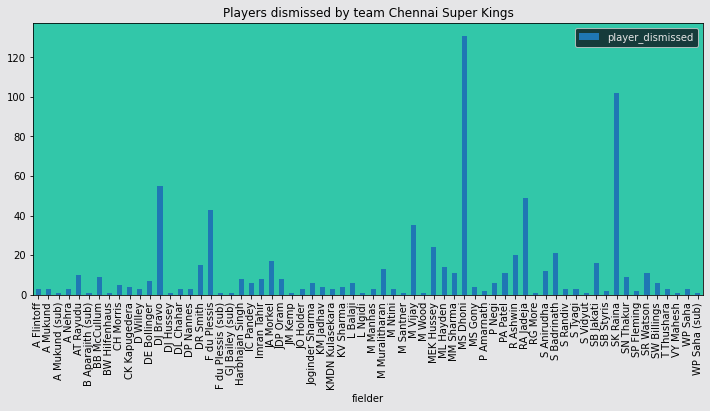

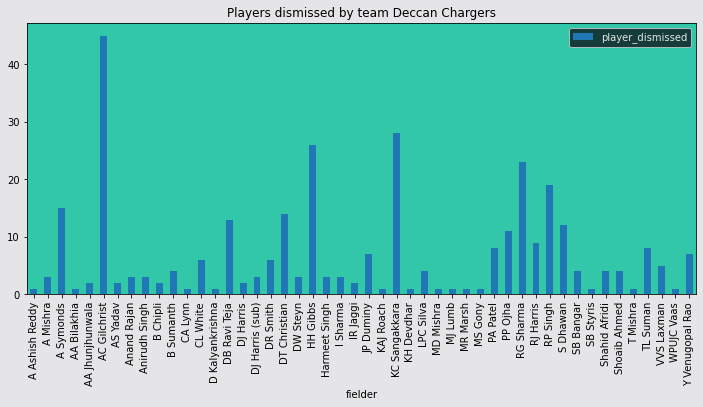

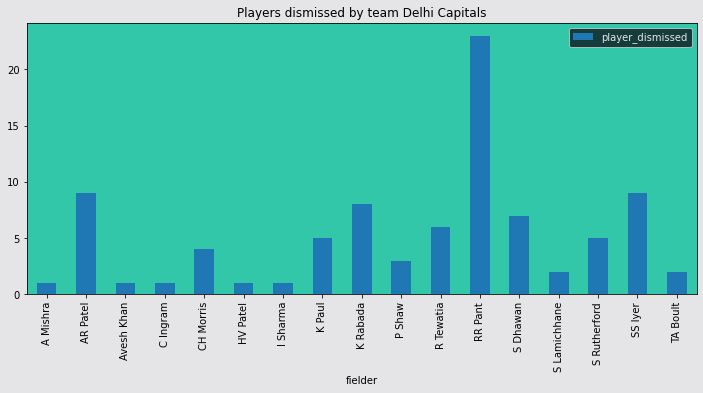

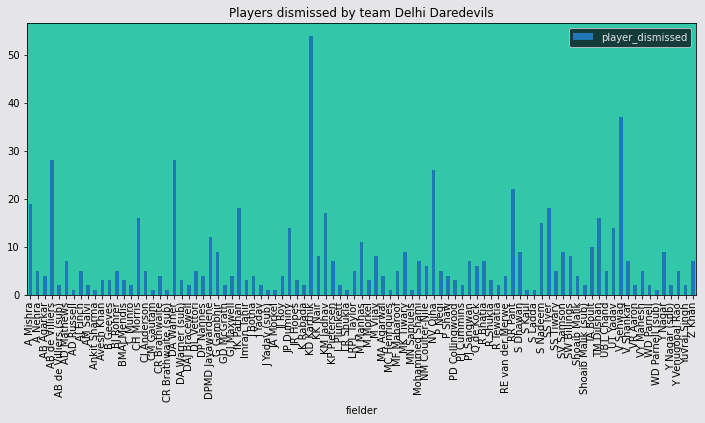

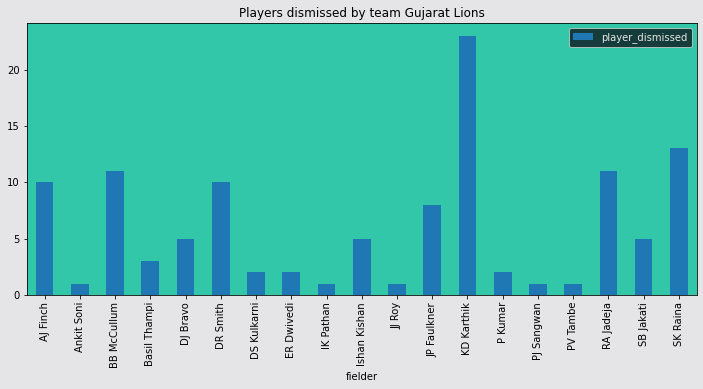

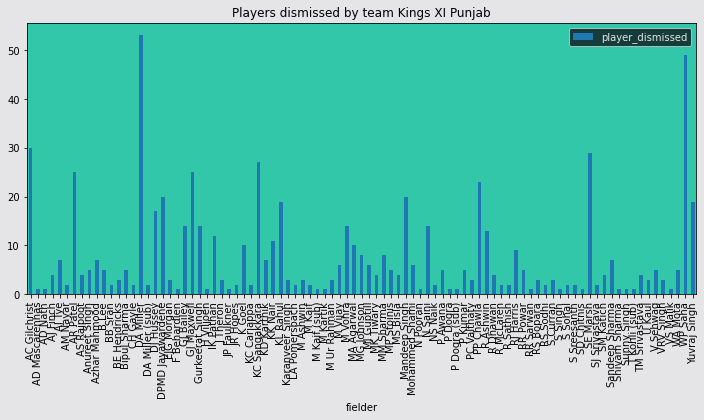

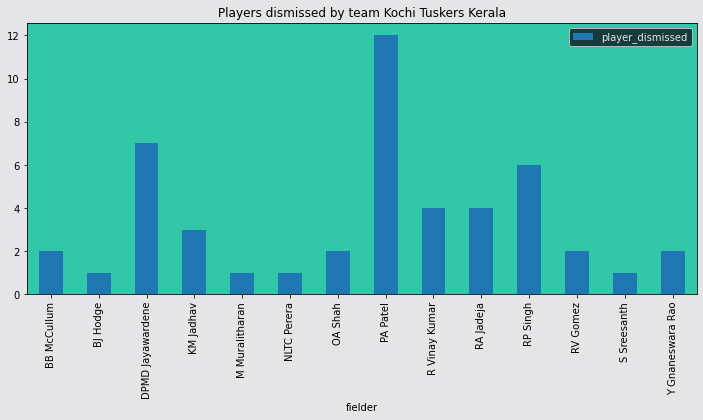

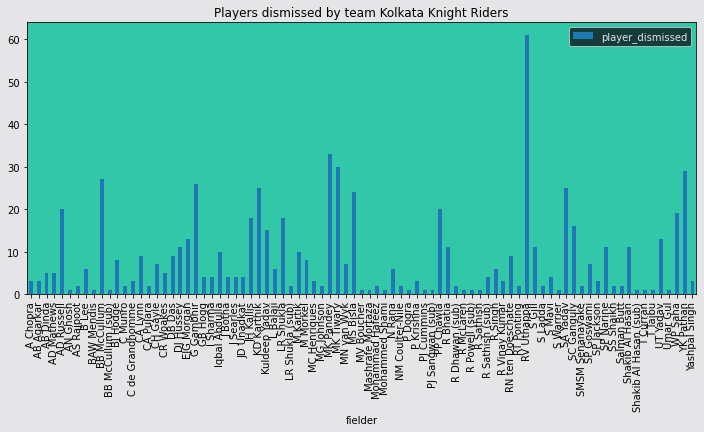

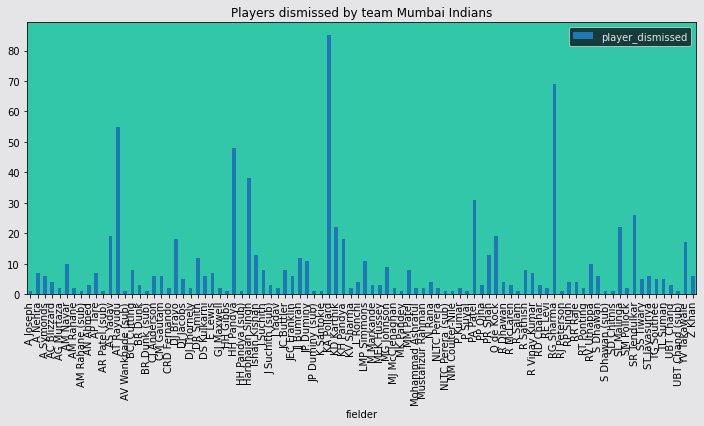

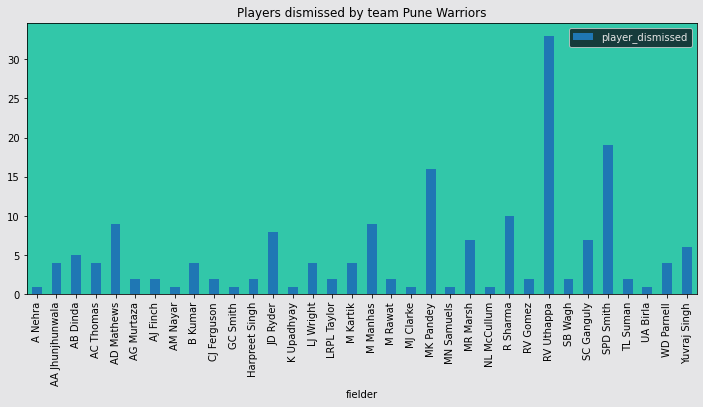

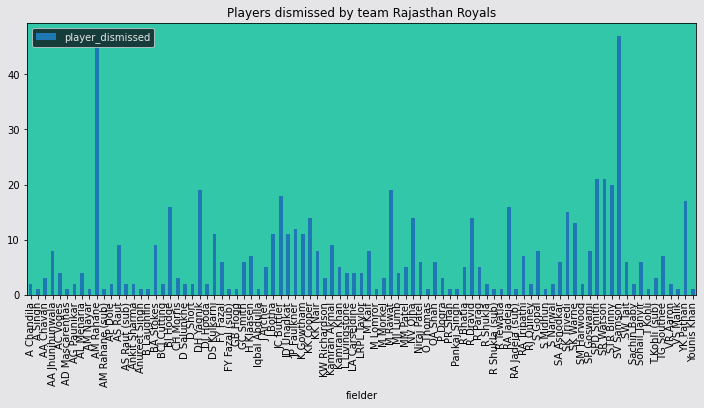

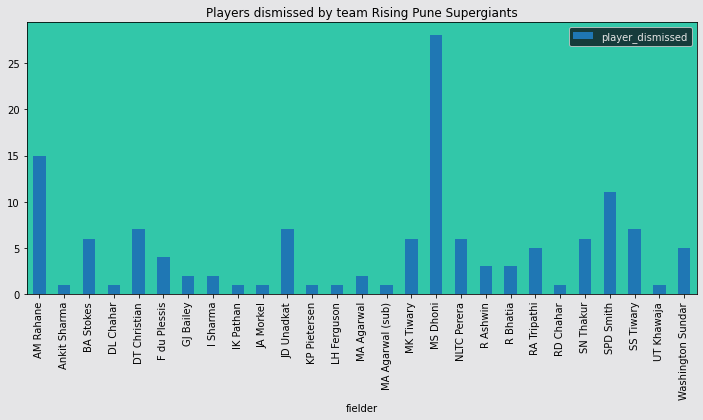

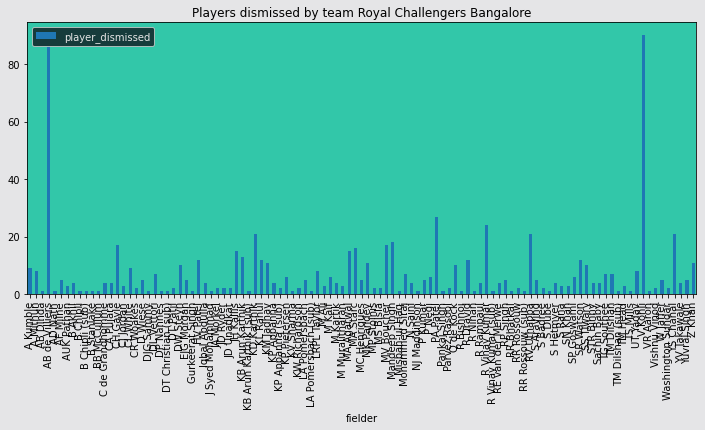

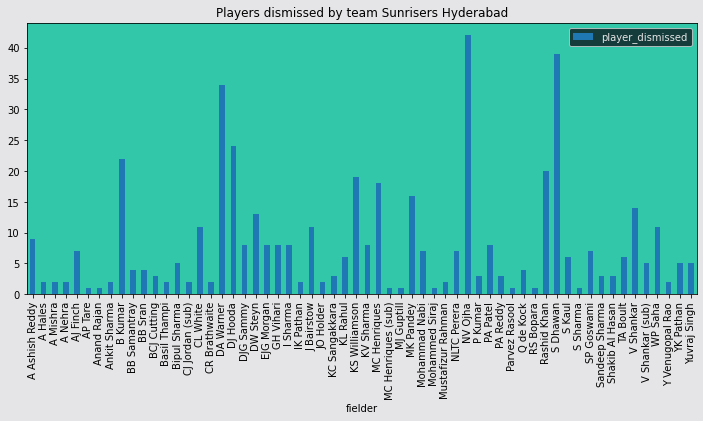

In [48]:
for row in fielder_group['bowling_team'].unique():
    ig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e7" )
    ax.set_facecolor("#32c7a9")
    fielder_group[fielder_group['bowling_team']==f"{row}"].plot(x='fielder',y='player_dismissed',kind='bar',ax=ax).set_title(f"Players dismissed by team {row}")
    ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")
    plt.show()

In [50]:
bowling_teams1 = list(fielder_group['bowling_team'].unique())

In [53]:
top_fielders = {}
for bowling in bowling_teams1:
    top_fielders[f"{bowling}"] = list(fielder_group[fielder_group['bowling_team']==f"{bowling}"]
                                     [fielder_group[fielder_group['bowling_team']==f"{bowling}"]
                                      ['player_dismissed']>np.quantile(fielder_group[fielder_group['bowling_team']==f"{bowling}"]['player_dismissed'],0.98)]
                                         ['fielder'].unique())

In [54]:
top_fielders


{'Chennai Super Kings': ['MS Dhoni', 'SK Raina'],
 'Deccan Chargers': ['AC Gilchrist'],
 'Delhi Capitals': ['RR Pant'],
 'Delhi Daredevils': ['KD Karthik', 'V Sehwag'],
 'Gujarat Lions': ['KD Karthik'],
 'Kings XI Punjab': ['DA Miller', 'WP Saha'],
 'Kochi Tuskers Kerala': ['PA Patel'],
 'Kolkata Knight Riders': ['MK Pandey', 'RV Uthappa'],
 'Mumbai Indians': ['KA Pollard', 'RG Sharma'],
 'Pune Warriors': ['RV Uthappa'],
 'Rajasthan Royals': ['AM Rahane', 'SV Samson'],
 'Rising Pune Supergiants': ['MS Dhoni'],
 'Royal Challengers Bangalore': ['AB de Villiers', 'PA Patel', 'V Kohli'],
 'Sunrisers Hyderabad': ['NV Ojha', 'S Dhawan']}

Top fielders in each team

# Top Teams

In [27]:
team = pd.DataFrame(data.groupby(['match_id','batting_team',"bowling_team"]).total_runs.sum()).reset_index()

In [28]:
team

,match_id,batting_team,bowling_team,total_runs
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,172
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
2,2,Mumbai Indians,Rising Pune Supergiants,184
3,2,Rising Pune Supergiants,Mumbai Indians,187
4,3,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...
1505,11413,Sunrisers Hyderabad,Delhi Capitals,171
1506,11414,Chennai Super Kings,Delhi Capitals,162
1507,11414,Delhi Capitals,Chennai Super Kings,155
1508,11415,Chennai Super Kings,Mumbai Indians,157


In [29]:
team['diff1'] = team['total_runs'].diff(-1).iloc[::2]
team['diff2'] = team['total_runs'].diff(1).iloc[1::2]

In [30]:
team.replace(np.nan,0,inplace=True)

In [31]:
team['diff'] = team['diff1'] + team['diff2']

In [32]:
team

,match_id,batting_team,bowling_team,total_runs,diff1,diff2,diff
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,172,-35.0,0.0,-35.0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,0.0,35.0,35.0
2,2,Mumbai Indians,Rising Pune Supergiants,184,-3.0,0.0,-3.0
3,2,Rising Pune Supergiants,Mumbai Indians,187,0.0,3.0,3.0
4,3,Gujarat Lions,Kolkata Knight Riders,183,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...
1505,11413,Sunrisers Hyderabad,Delhi Capitals,171,0.0,1.0,1.0
1506,11414,Chennai Super Kings,Delhi Capitals,162,7.0,0.0,7.0
1507,11414,Delhi Capitals,Chennai Super Kings,155,0.0,-7.0,-7.0
1508,11415,Chennai Super Kings,Mumbai Indians,157,5.0,0.0,5.0


In [33]:
team.drop(['diff1','diff2'],axis=1,inplace=True)

In [34]:
team['matches_won'] = (team['diff']>0).astype(int)

In [35]:
team

,match_id,batting_team,bowling_team,total_runs,diff,matches_won
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,172,-35.0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,35.0,1
2,2,Mumbai Indians,Rising Pune Supergiants,184,-3.0,0
3,2,Rising Pune Supergiants,Mumbai Indians,187,3.0,1
4,3,Gujarat Lions,Kolkata Knight Riders,183,-1.0,0
...,...,...,...,...,...,...
1505,11413,Sunrisers Hyderabad,Delhi Capitals,171,1.0,1
1506,11414,Chennai Super Kings,Delhi Capitals,162,7.0,1
1507,11414,Delhi Capitals,Chennai Super Kings,155,-7.0,0
1508,11415,Chennai Super Kings,Mumbai Indians,157,5.0,1


In [36]:
df_team = pd.DataFrame(team.groupby(['batting_team']).matches_won.sum()).reset_index()

In [37]:
df_team

,batting_team,matches_won
0,Chennai Super Kings,93
1,Deccan Chargers,34
2,Delhi Capitals,6
3,Delhi Daredevils,75
4,Gujarat Lions,13
5,Kings XI Punjab,78
6,Kochi Tuskers Kerala,6
7,Kolkata Knight Riders,84
8,Mumbai Indians,108
9,Pune Warriors,15


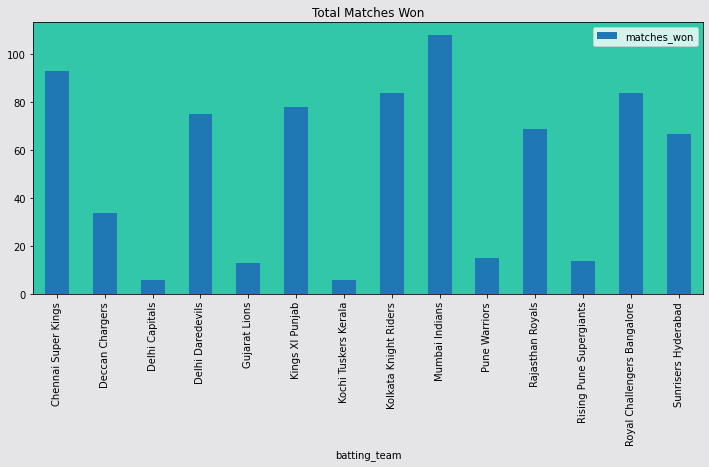

In [38]:
ig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e7" )
ax.set_facecolor("#32c7a9")
df_team.plot(x='batting_team',y='matches_won',kind='bar',ax=ax).set_title(f"Total Matches Won")

plt.show()

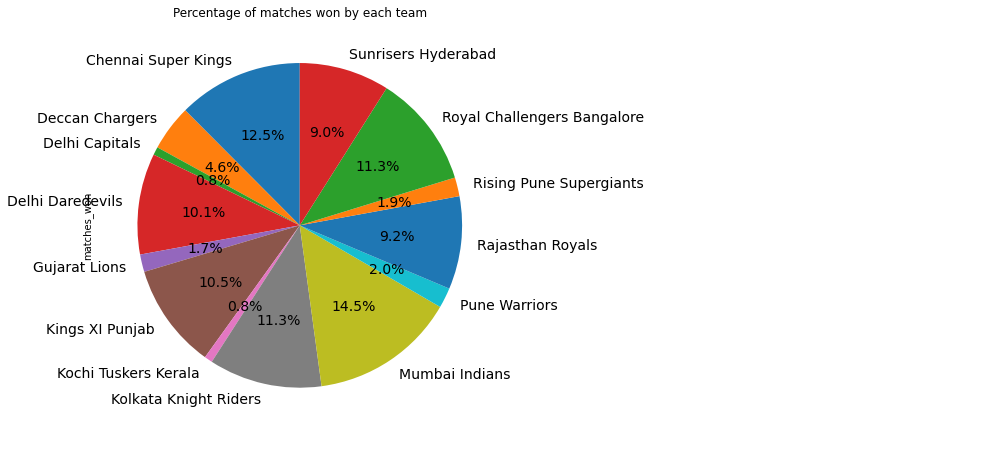

In [39]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_team.plot(kind='pie', y = 'matches_won', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_team['batting_team'], legend = False, fontsize=14).set_title(f"Percentage of matches won by each team")

# plot table
ax2 = plt.subplot(122)
plt.axis('off')

plt.show()

In [40]:
d1 = df_team.sort_values('matches_won',ascending=False,ignore_index=True)

In [41]:
d1.index = d1.index+1

In [42]:
d1

,batting_team,matches_won
1,Mumbai Indians,108
2,Chennai Super Kings,93
3,Kolkata Knight Riders,84
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,78
6,Delhi Daredevils,75
7,Rajasthan Royals,69
8,Sunrisers Hyderabad,67
9,Deccan Chargers,34
10,Pune Warriors,15


Top Teams